In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import lightkurve as lk

# False Positives - In and Out of Flux Comparison

This notebook continues with the mini-series on how to look for false positives in TESS data. This notebook looks at the flux both in and out of the transit event and compares the two. If the transit event is happening on the correct target (in our case the correct target is on the centre most pixel of the cut-out) then the difference image should show the largest difference on that centre pixel! 

Notes:

- You need to run each cell. Do this by either pressing the 'run' button at the top of the page or pressing shift+enter (this is what Nora does in the videos). 

- When you run a cell, a star will appear in the brackets to the left of the cell while the cell is runnning. Once it has successfully completed running the code the star will turn into a number (often it runs so fast that you don't see the star).

- Text following a #, or within triple quotation marks (''') is ignored by the code (except in this cell because I made this into a text cell)


<IPython.core.display.Javascript object>


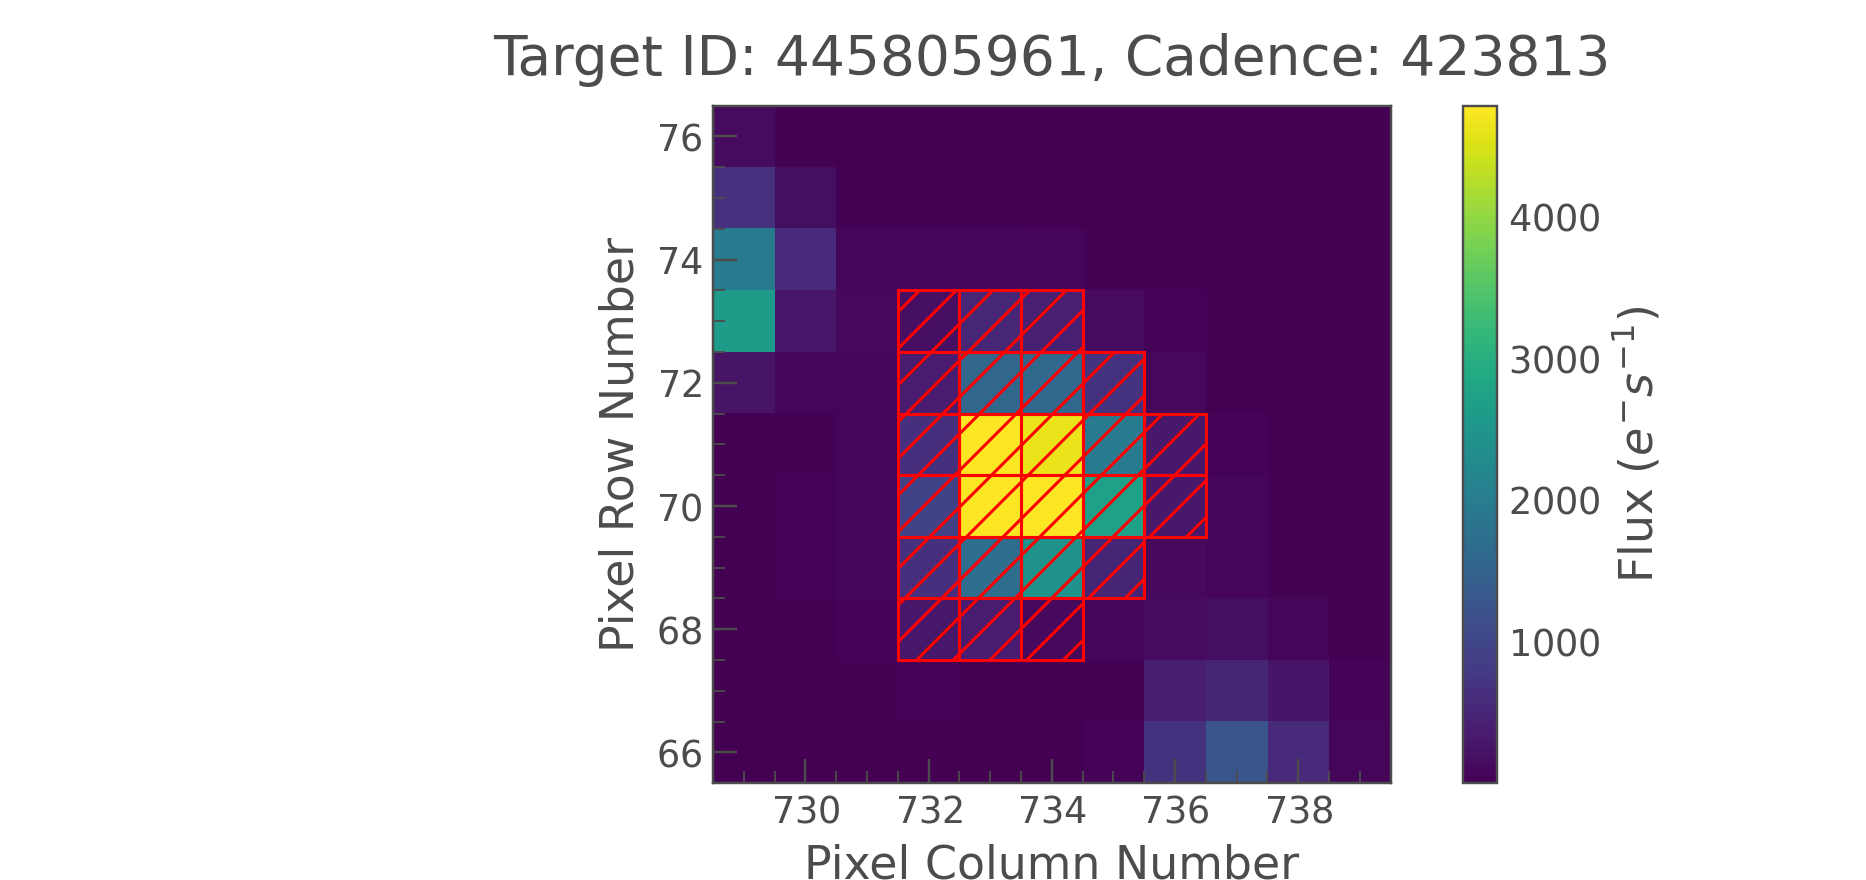

<IPython.core.display.Javascript object>


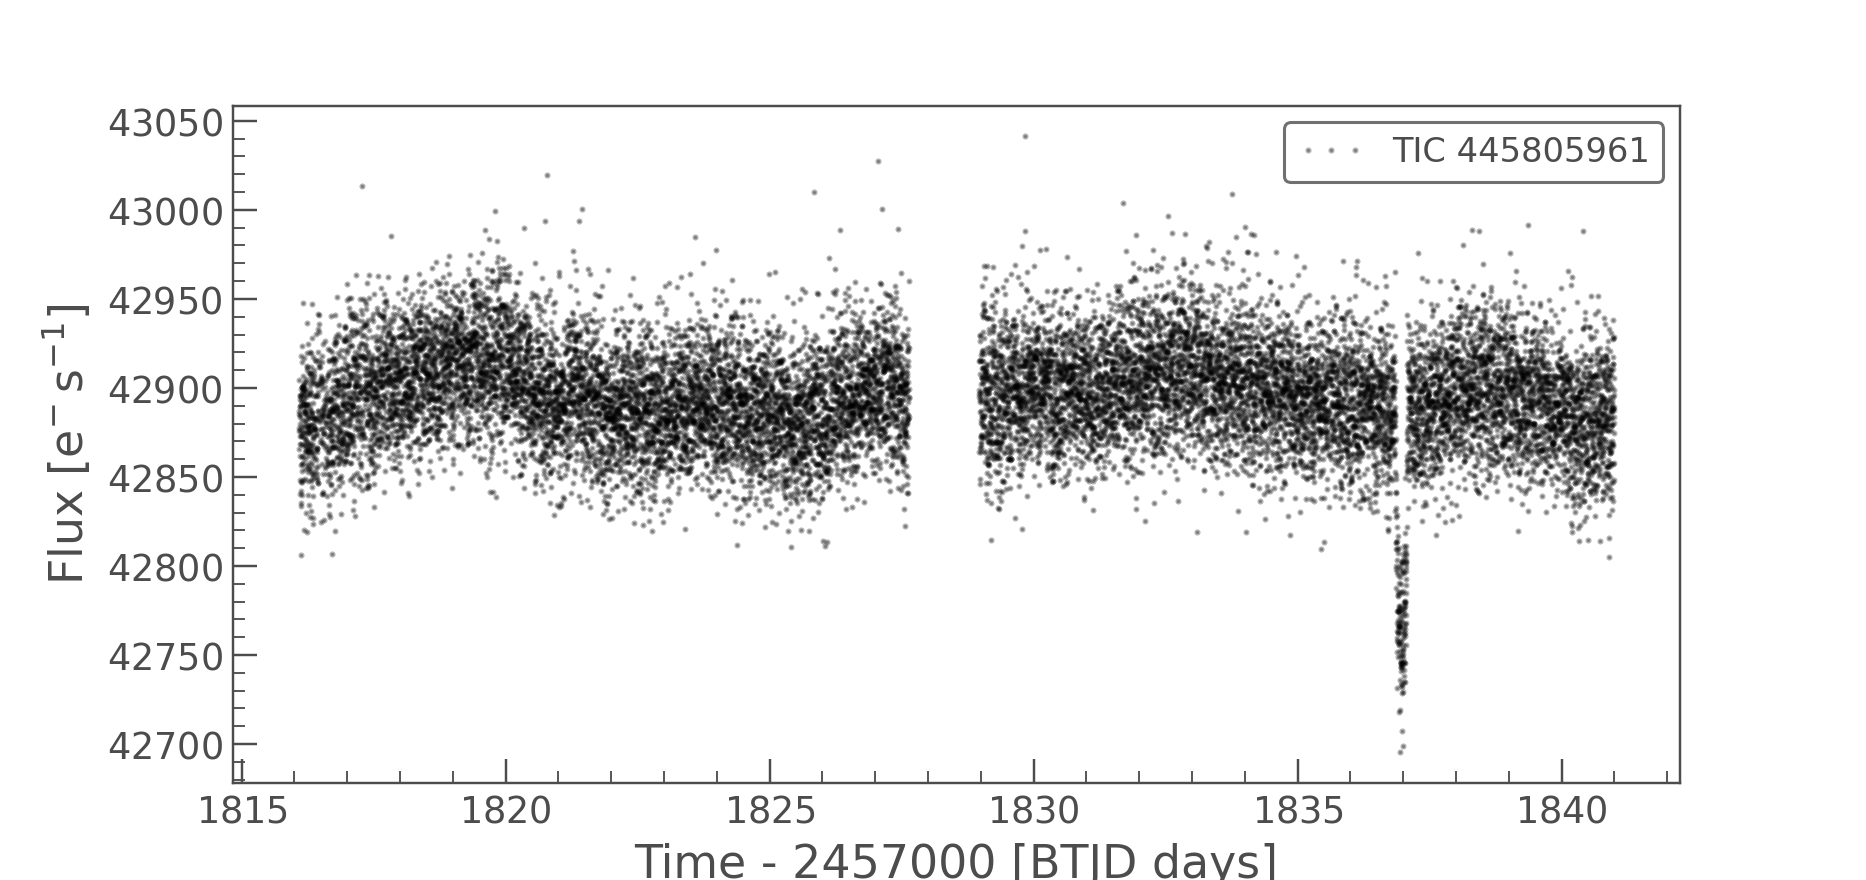

In [48]:
# download the TESS target pixel file
TIC = 'TIC 445805961' # !! CHANGE THIS to run code for a different TIC ID

# for this analysis we only want one sector of data, so user the 'sector = ' command in the line below.

# download the target pixel file (this command is different to simply downloading the lightcurve!)
search_result = lk.search_targetpixelfile(TIC, author="SPOC", sector=19) # CHANGE the sector for different targets
tpf = search_result.download()
tpf.plot(aperture_mask='pipeline')


# download the TESS lightcurve for the same sector (this is what we covered in the lightkurve mini-series)
# search what SPOC data is available for a given target - and chose a sector (in example this is sector 5)
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 19) # CHANGE the sector for different targets 

# download and plot the data
lc = sector_data.download()
lc.plot(linewidth = 0, marker = '.', color = 'black', alpha = 0.3)

In [54]:
'''
This cell contains the 'function' that plots the in and out of transit flux comparison plots! 
You don't need to do anything with this code but you do have to RUN THIS CELL for the test to work! 
'''

def plot_in_out_TPF(tpf,  T0):

    tpf_list = [tpf.flux.value]
    t_list = [tpf.time.value]
    T0_list = [T0]
    
    plt.figure(figsize=(9,2.5*len(T0_list)))

    plt.tight_layout()

    count = 0 # keep track of how many images have been plotted to that they appear on a subgrid of plots which has three columns

    # loop through all of the list of PCA corrected flux vs time arrays for each marked transit-event
    for idx, tpf_filt in enumerate(tpf_list): # idx is for each maked transit-event

        T0 = T0_list[idx] # the time of the transit-like event
        t = t_list[idx] # the time array

        intr = abs(T0-t) < 0.25  # create a mask of the in transit times
        oot = (abs(T0-t) < 0.5) * (abs(T0-t) < 0.3)  # create a mask of the out of transit times
        img_intr = tpf_filt[intr,:,:].sum(axis=0)/float(intr.sum()) # apply the masks and normalize the flux
        img_oot = tpf_filt[oot,:,:].sum(axis=0)/float(oot.sum())
        img_diff = img_oot-img_intr # calculate the diffefence image (out of transit minus in-transit)

        
        # ---- PLOT -------

        # in transit
        count += 1 # add to the count before each plot
        plt.subplot(len(T0_list), 3, count)
        plt.axis('off')
        plt.imshow(img_intr, cmap=plt.cm.viridis, origin = 'lower')
        plt.colorbar()
        plt.title("t = {} days \n In Transit Flux (e-/candence)".format(T0), fontsize = 9 )

        # out of transit
        count += 1
        plt.subplot(len(T0_list), 3, count)
        plt.axis('off')
        plt.imshow(img_oot, cmap=plt.cm.viridis, origin = 'lower')
        plt.colorbar()
        plt.title("Out of Transit Flux (e-/candence)", fontsize = 9 )

        # out of transit minus in-transit
        count += 1
        plt.subplot(len(T0_list), 3, count)
        plt.axis('off')
        plt.imshow(img_diff, cmap=plt.cm.viridis, origin = 'lower')
        plt.colorbar()
        plt.title("Difference Flux (e-/candence)", fontsize = 9 )


    plt.subplots_adjust(wspace = 0)
    plt.tight_layout()
    

<IPython.core.display.Javascript object>


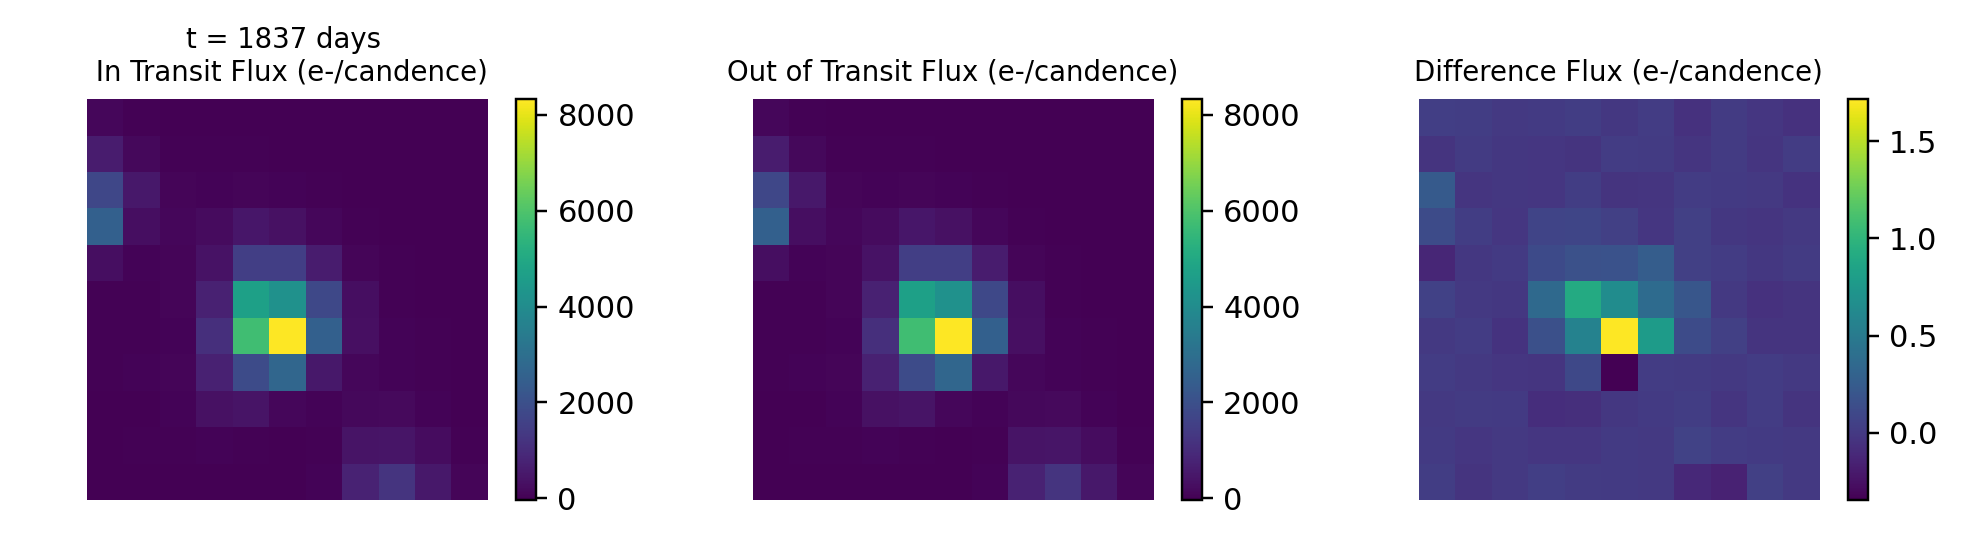

In [56]:
'''we can now use the function that was defined above to plot the test for a given target
(we'll start with the target that we already downlaoded data for above)

okay, so for the code to work all we need to do is define the time of the transit event!
'''

transit_time = 1837 # time of transit (change this for another target)

# now run the function
plot_in_out_TPF(tpf, transit_time)

The images above show an example of when the transit event IS on target - we can see this as the brightnest pixel in the image on the right (the difference image) is on the same pixel as the brightnest pixel in the two images on the left and centre! This is NOT a false positive (we'll get to those next).

<IPython.core.display.Javascript object>


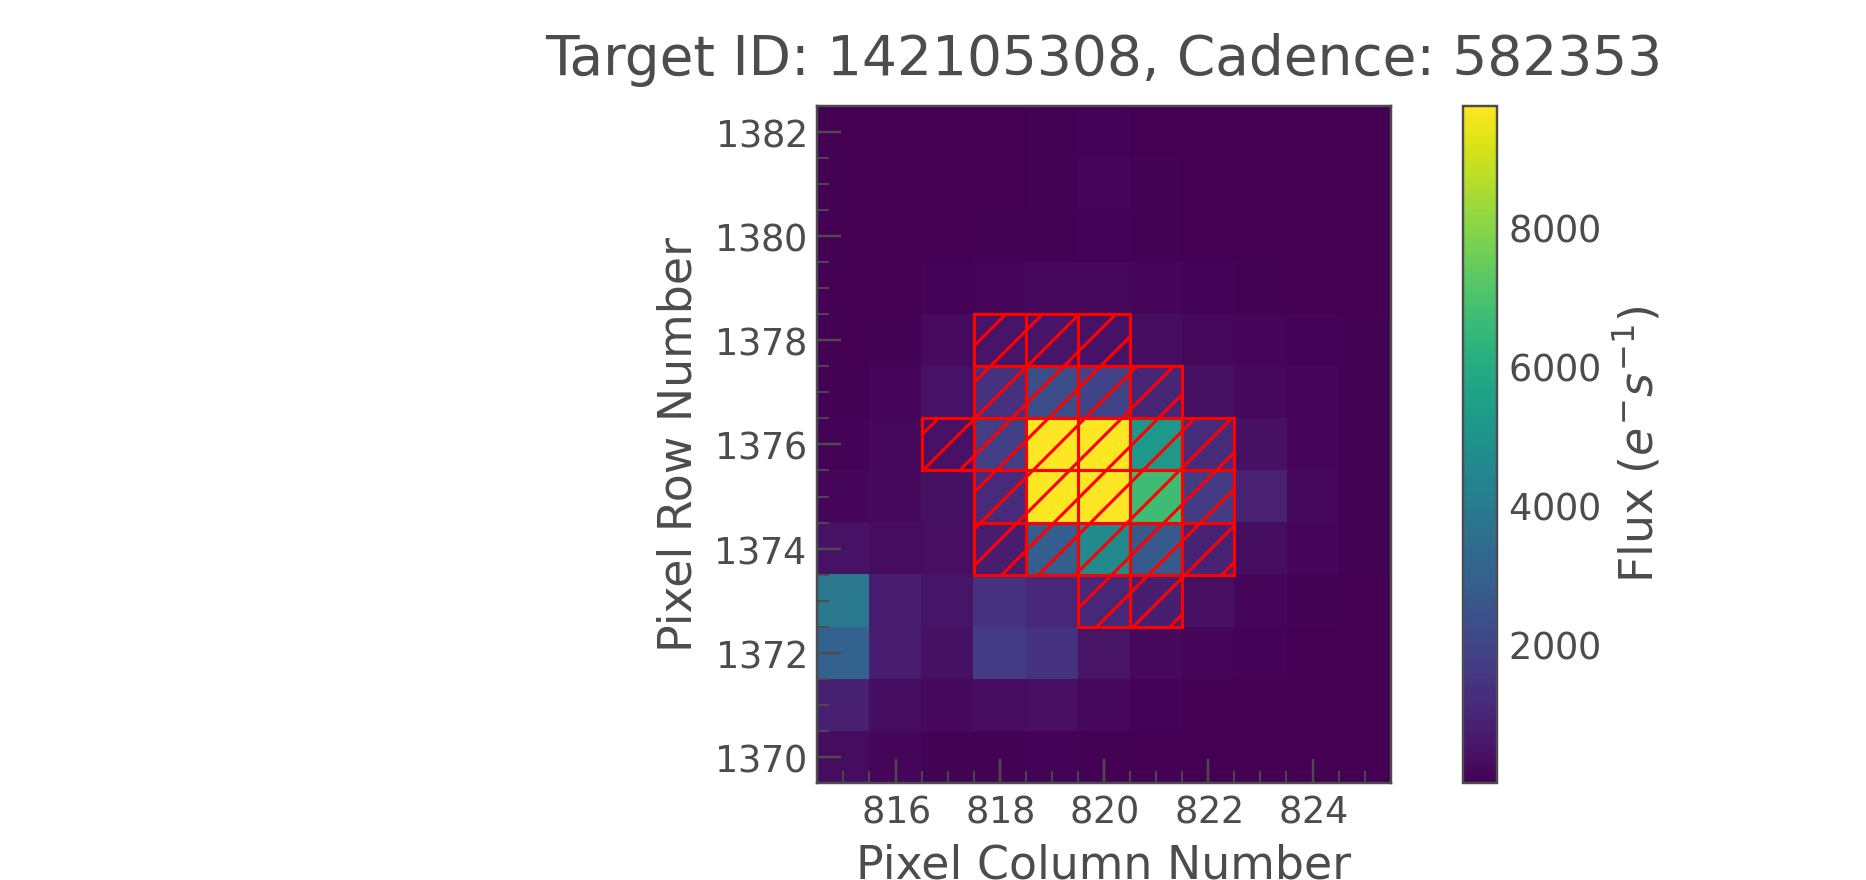

<IPython.core.display.Javascript object>


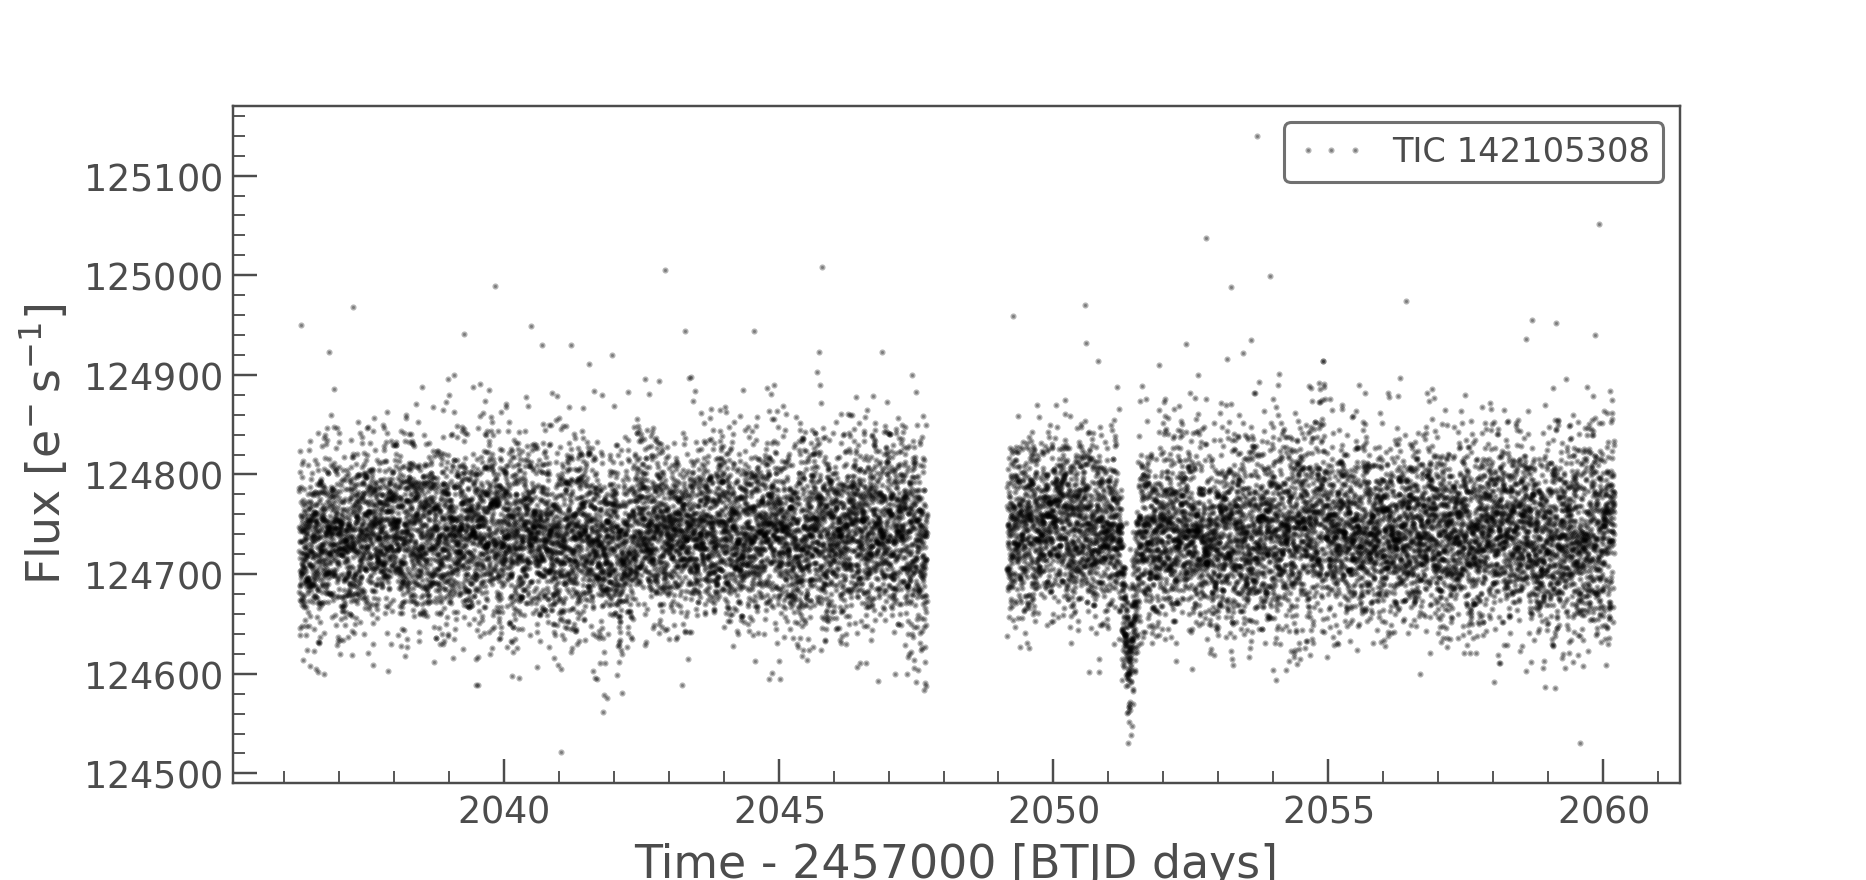

In [57]:
# download the TESS target pixel file
TIC = 'TIC 142105308' # !! CHANGE THIS to run code for a different TIC ID

search_result = lk.search_targetpixelfile(TIC, author="SPOC", sector = 27) # change the sector for different targets
tpf = search_result.download()
tpf.plot(aperture_mask='pipeline')

# download the TESS lightcurve for the same sector 
# you want to download the TESS lightcurve so that you know where the transit event is (you need this time!!)
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 27) # change the sector for different targets

lc = sector_data.download()
lc.plot(linewidth = 0, marker = '.', color = 'black', alpha = 0.3)

<IPython.core.display.Javascript object>


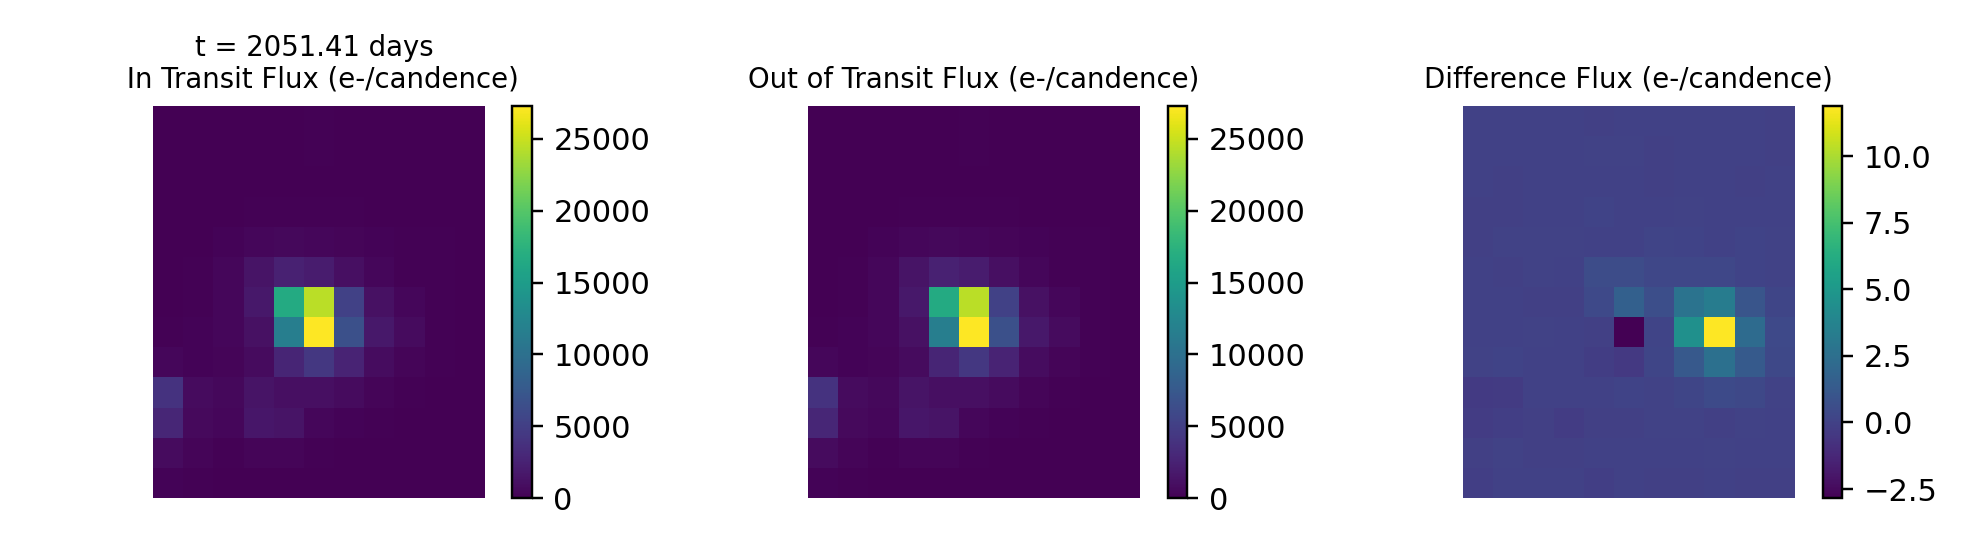

In [58]:
# now that we downlaoded the target pixel file (we need this for the code below)
# and downlaoded hte lightcurve (to determien the time of the transit, which we also need)
# we can now run our function to plot the three images:

# define the three things that we need first:

T0 = 2051.41 # !! CHANGE THIS for different target

plot_in_out_TPF(tpf, T0)

This is an example of a false positive - as you can see above the location of the brightest pixel moves in the difference image. This is an example of an eclipsing binary located on a different pixel (known as a background eclipsing binary). We'll do one more example of a false positive below:

<IPython.core.display.Javascript object>


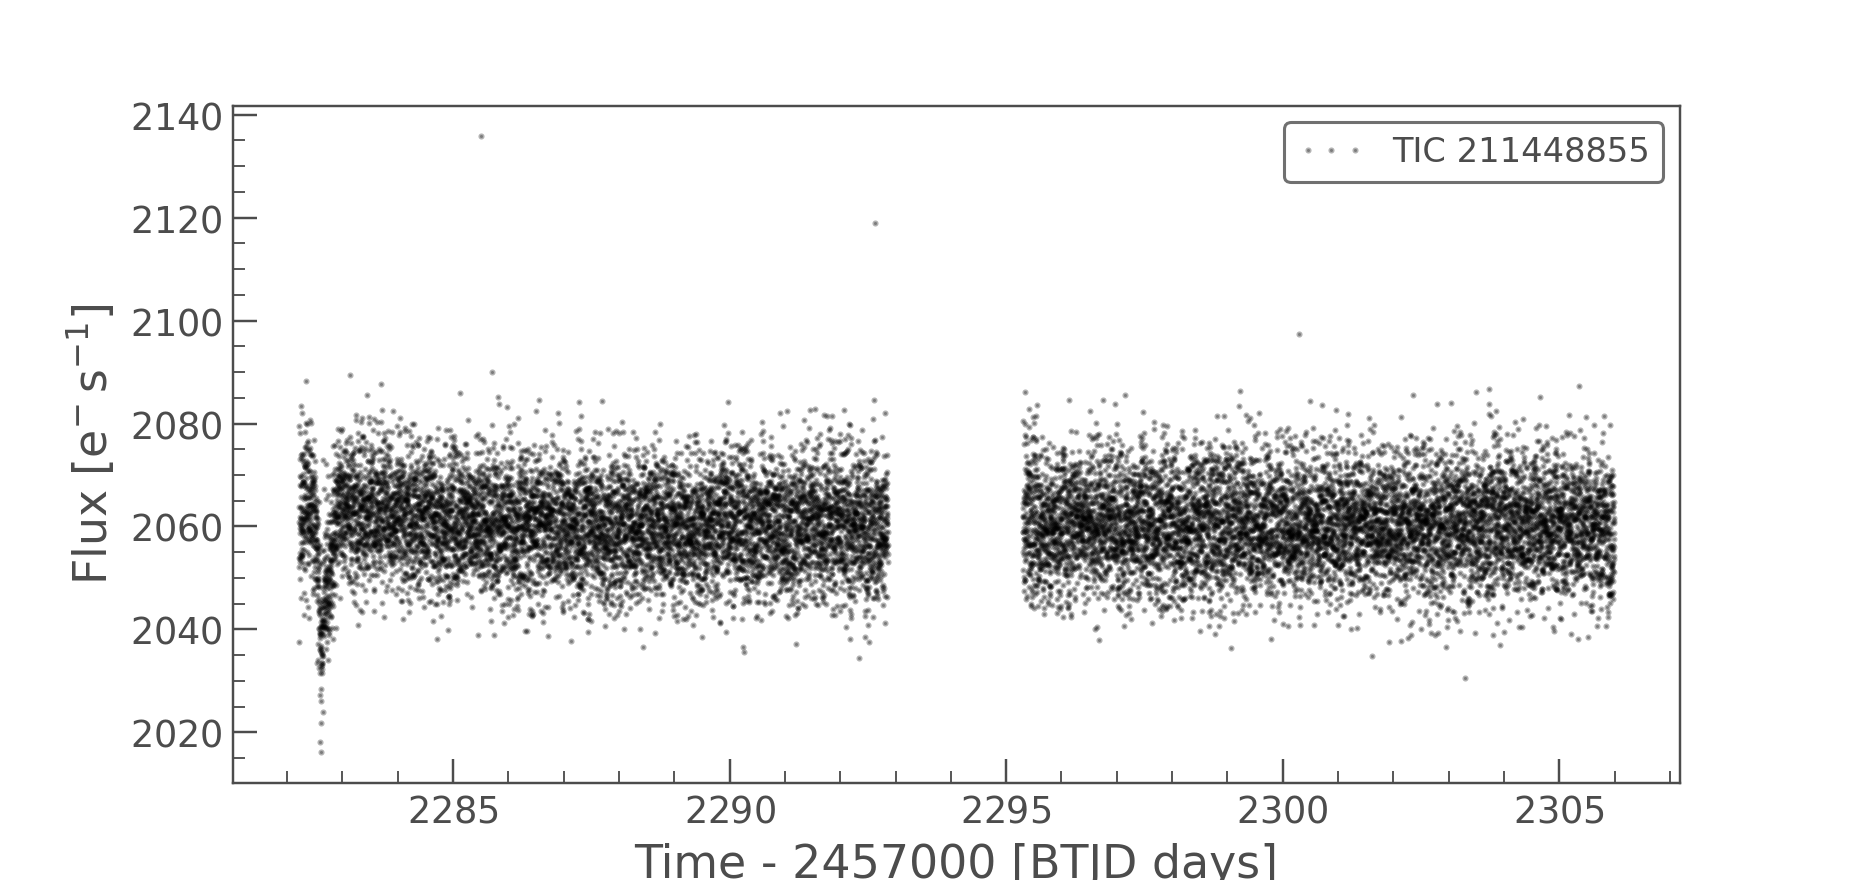

In [59]:
# download the TESS target pixel file
TIC = 'TIC 211448855' # !! CHANGE THIS to run code for a different TIC ID

search_result = lk.search_targetpixelfile(TIC, author="SPOC", sector = 36) # change the sector for different targets
tpf = search_result.download()

# download the TESS lightcurve for the same sector 
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 36) # change the sector for different targets

lc = sector_data.download()
lc.plot(linewidth = 0, marker = '.', color = 'black', alpha = 0.3)

<IPython.core.display.Javascript object>


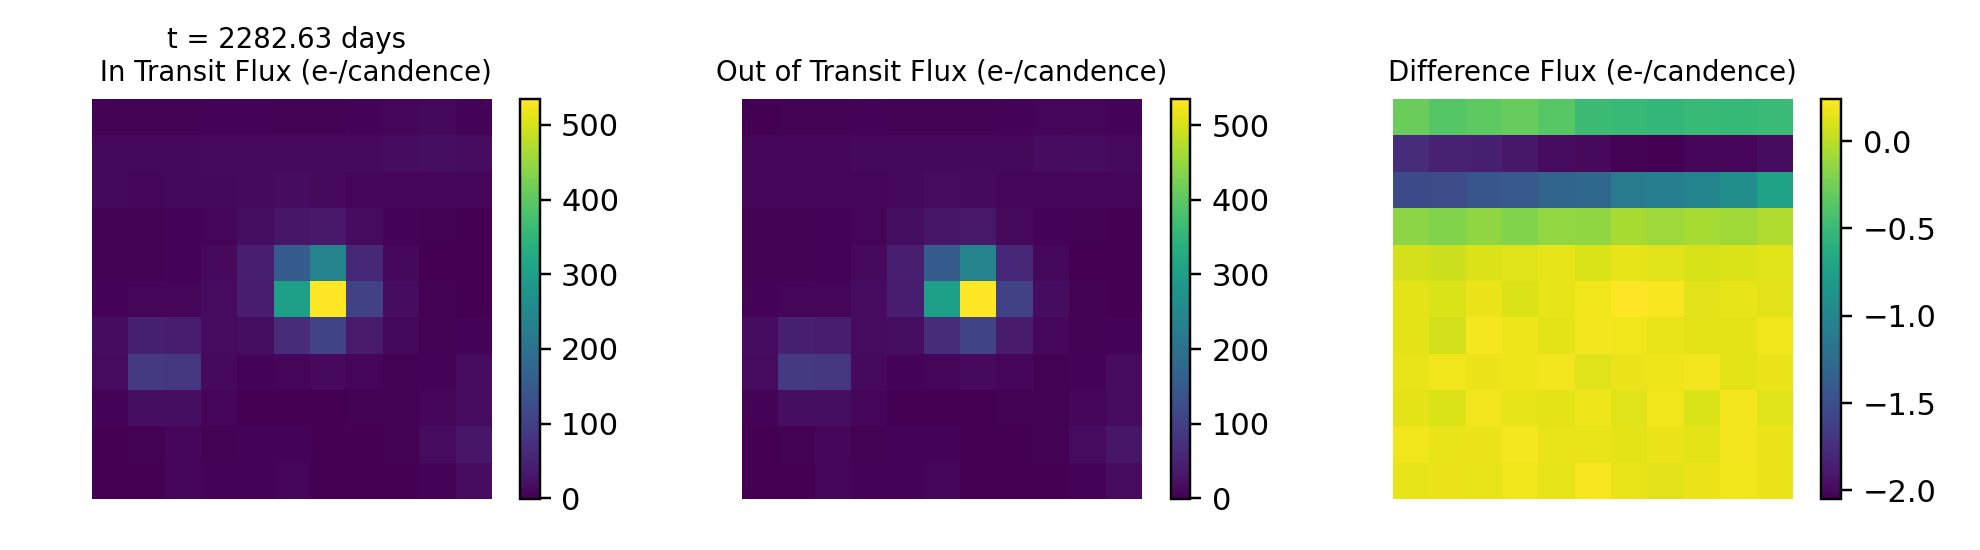

In [60]:
# define the three things that we need first:

T0 = 2282.63

plot_in_out_TPF(tpf, T0)

In this final example we can see a line going through the top of the cutout - this is caused by an asteroid!! (so this is also a false positive). 


Try to fill in the code below with your own target:

NOTE the below code won't run unless you fill the necessary parts!

In [44]:
TIC = # enter TIC ID here

# replace the question marks in the line below with the sector in which the target was osberved
search_result = lk.search_targetpixelfile(TIC, author="SPOC", sector = ????) 
tpf = search_result.download()

# enter that same sector in the line below 
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = ????) 

lc = sector_data.download()
lc.plot(linewidth = 0, marker = '.', color = 'black', alpha = 0.3)

In [ ]:

T0 = # enter the time of the transit event here

plot_in_out_TPF(tpf, t, T0)

# now look at the plot and see whether your own target is a false positive or not 
# NOTE: just because it's not a false positive doesn't mean it's a real planet yet (unfortunatelty!) 